In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Synthetic Data
A = np.random.normal(size=(3,2))
print(linalg.matrix_rank(A))

2


In [3]:
# Generation of Dataset 1
V = np.random.normal(size=(2, 500))
X = A @ V
print(X.shape)
print(linalg.matrix_rank(X))

(3, 500)
2


In [4]:
# Singular Value and Eigenvalue Decomposition of Dataset1
# 1
u, d, v = linalg.svd(X)
we, ve = linalg.eig(X @ X.T)
print('Left singular vectors of X:')
print(u)
print('Eigenvectors of XX^T:')
print(ve)

print('Singular values of X squared:')
print(np.square(d))
print('Eigenvalues of XX^T:')
print(we)

print('Energy of X')
print(linalg.norm(X)**2)
print('Sum of squares of singular values:')
print(np.sum(np.square(d)))

Left singular vectors of X:
[[-0.73438733 -0.03346686 -0.67790502]
 [-0.65742813 -0.21319179  0.72272921]
 [-0.16871126  0.97643701  0.1345633 ]]
Eigenvectors of XX^T:
[[ 0.73438733  0.67790502 -0.03346686]
 [ 0.65742813 -0.72272921 -0.21319179]
 [ 0.16871126 -0.1345633   0.97643701]]
Singular values of X squared:
[  2.75874153e+03   8.63287075e+02   4.60652447e-28]
Eigenvalues of XX^T:
[  2.75874153e+03  -1.07469589e-13   8.63287075e+02]
Energy of X
3622.02860034
Sum of squares of singular values:
3622.02860034


In [5]:
# 2
# One of the singular values of X is very low (around the magnitude 10^-29)
# This is essentially 0, but not exactly 0 because of floating point errors

The 2 largest singular values and related columns of A form a basis of the dataset X (X is formed by a linear combination of the two columns of A based on the values chosen in V). So, the left singular vectors of X span the same space as the first 2 columns from the SVD of A.

PCA of Dataset 1

2 principal components should suffice to capture all the variation in the data.
The data was generated by multiplying a fixed matrix A with a size-2 vector for each data point (the columns of V)
So, all the variation in the data can be captured from the distribution of v_i

Each data sample $x$ is calculated from $Av$.
$v$ is a random vector with entries that are iid Gaussian, with mean 0 and variance 1. $A$ is a constant, so each row of $A$ (referred to as $A_i$) is a constant. By linearity of expectation:

$E[x_i] = E[A_{i,:}v] = E[A_{i,1}v_1 + A_{i,2}v_2] = A_{i,1}E[v_1] + A_{i,2}E[v_2]$

The expected value for each entry of $v$ is 0, so the sum of the expected values above is 0.

In [7]:
# 2 cont
print(np.mean(X, axis=1)) # pretty small

[-0.0178341  -0.02945852  0.06837458]


In [8]:
# must set one of numPC or accuracy
def pca(X, numPC=None, accuracy=None):
    u, d, v = linalg.svd(X)
    if accuracy is not None:
        energy = linalg.norm(X)**2
        sumEig = 0
        for i, eigval in enumerate(list(d)):
            sumEig += eigval**2
            if sumEig / energy >= accuracy:
                numPC = i + 1
                break
    U = u[:, :numPC]
    return U


def featuresRepError(X, U):
    Xf = U.T @ X
    Xrec = U @ Xf
    repError = linalg.norm(Xrec - X)**2
    return Xf, Xrec, repError

In [9]:
# 3
U = pca(X, numPC=2)
print(U)

[[-0.73438733 -0.03346686]
 [-0.65742813 -0.21319179]
 [-0.16871126  0.97643701]]


In [10]:
# 4
Xf, Xrec, repError = featuresRepError(X, U)
print('Error: {}'.format(repError))

Error: 1.7903487261376306e-27


Error: 863.2870748113661
Square of second-largest eigenvalue: 863.287074811367


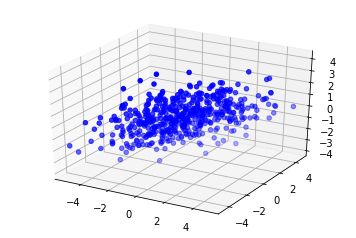

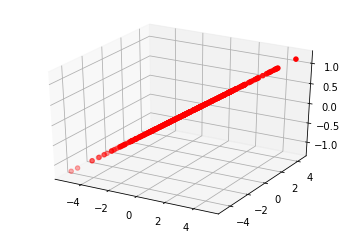

In [11]:
# 5
U1 = U[:, :1]
Xf1, Xrec1, repError1 = featuresRepError(X, U1)
print('Error: {}'.format(repError1))
print('Square of second-largest eigenvalue: {}'.format(d[1]**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0,:], X[1,:], zs=X[2,:], c='b')
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(Xrec1[0,:], Xrec1[1,:], zs=Xrec1[2,:], c='r')

In [12]:
# Generation of Dataset 2
# 1
c = np.random.normal(size=(3,1))

In [13]:
# 2
V = np.random.normal(size=(2, 500))
X = A @ V + c
print(linalg.matrix_rank(X))

3


In [14]:
# PCA, Centering of Dataset 2
# 1
U = pca(X, numPC=2)
Xf, Xrec, repError = featuresRepError(X, U)
print('Error: {}'.format(repError))

Error: 154.77408783949303


In [15]:
# 1, repeat with centering
xmean = np.mean(X, axis=1).reshape((3,1))
Xcent = X - xmean
U = pca(Xcent, numPC=2)
Xf, Xrec, repError = featuresRepError(Xcent, U)
repErrorWithMean = linalg.norm(X - (Xrec + xmean))**2
print('Error: {}'.format(repErrorWithMean))

Error: 2.7339592451587453e-27


In [16]:
# Generation of Dataset 3
V = np.random.normal(size=(2, 500))
N = np.random.normal(0, 0.01, size=(3,500))
X = A @ V + N
xnorms = np.tile(linalg.norm(X, axis=0), (3, 1))
Xnorm = np.divide(X, xnorms)

print(linalg.matrix_rank(Xnorm))

u,d,v = linalg.svd(Xnorm)
print('Singular values of normalized data:')
print(d)

3
Singular values of normalized data:
[ 18.20653794  12.97984765   0.21337993]


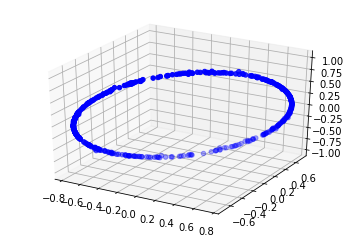

In [17]:
# PCA Denoising of Dataset 3
# 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xnorm[0,:], Xnorm[1,:], zs=Xnorm[2,:], c='b')

Representation error: 0.04553099376943814
Square of third singular value: 0.045530993769438206


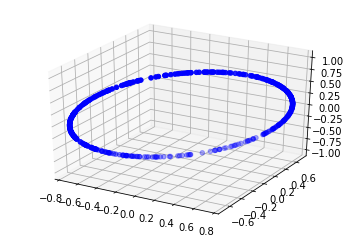

In [18]:
# 2, 3, 4
U = pca(Xnorm, numPC=2)
Xf, Xrec, repError = featuresRepError(Xnorm, U)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xrec[0,:], Xrec[1,:], zs=Xrec[2,:], c='b')
print('Representation error: {}'.format(repError))
print('Square of third singular value: {}'.format(d[2]**2))

In [19]:
# Real Data
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


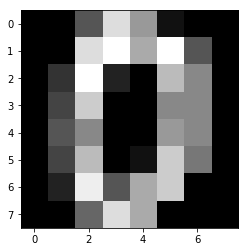

In [20]:
# 1
img = np.reshape(images[0,:], (8,8))
plt.imshow(img, cmap='gray')

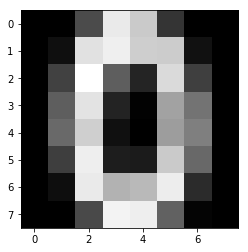

In [21]:
# 2
imgmean = np.mean(images, axis=0)
imagesCent = images - imgmean
plt.imshow(np.reshape(imgmean, (8,8)), cmap='gray')

Number of components needed for 90% accuracy:  18


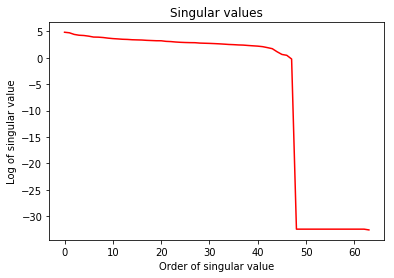

In [22]:
# 3
u, d, v = linalg.svd(imagesCent)
plt.plot(np.arange(np.size(d)), np.log(d), 'r')
plt.title('Singular values')
plt.xlabel('Order of singular value')
plt.ylabel('Log of singular value')
U = pca(imagesCent, accuracy=0.9)
print('Number of components needed for 90% accuracy: ', U.shape[1])

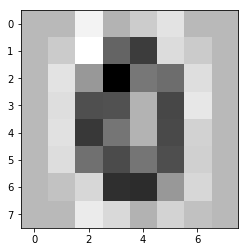

In [23]:
# 4
pc1 = np.reshape(U[:,0] @ imagesCent, (8,8))
plt.imshow(pc1, cmap='gray')

Error:  36050.0106057
Sum of squared singular values (after top 3): 36050.0106057


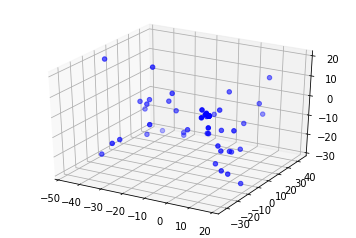

In [24]:
# 5
Xf, Xrec, repError = featuresRepError(imagesCent, U[:,:3])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xf[0,:], Xf[1,:], zs=Xf[2,:], c='b')

imagesRec = Xrec + imgmean
repErrorWithMean = linalg.norm(images - imagesRec)**2
print('Error: ', repErrorWithMean)
sqSum = np.sum(np.square(d[3:]))
print('Sum of squared singular values (after top 3):', sqSum)

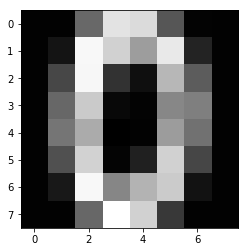

In [25]:
imgRec = np.reshape(imagesRec[0,:], (8,8))
plt.imshow(imgRec, cmap='gray')